In [1]:
import os
os.chdir('D:\\Gnan\\DA\\KMU\\Prediction-COVID-19')
from utils import *
from model import *
from trainer import *

from tqdm.notebook import tqdm
from torch.optim.adam import Adam
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

import warnings
warnings.filterwarnings('ignore')

In [2]:
city = '서울'

path = 'Data/Variants/Infected/alpha_delta/*.csv'
dic_files = Load_files.load_files(path, -18, -16)
data = dic_files[city]
data

stdDay  incDec  alpha_variants  delta_variants
0    2021-04-12   162.0           42.12            3.24
1    2021-04-13   158.0           41.08            3.16
2    2021-04-14   247.0           64.22            4.94
3    2021-04-15   217.0           56.42            4.34
4    2021-04-16   216.0           56.16            4.32
..          ...     ...             ...             ...
121  2021-08-11   660.0            6.60          627.00
122  2021-08-12   526.0            5.26          499.70
123  2021-08-13   524.0            5.24          497.80
124  2021-08-14   513.0            5.13          487.35
125  2021-08-15   488.0            4.88          463.60

[126 rows x 4 columns]

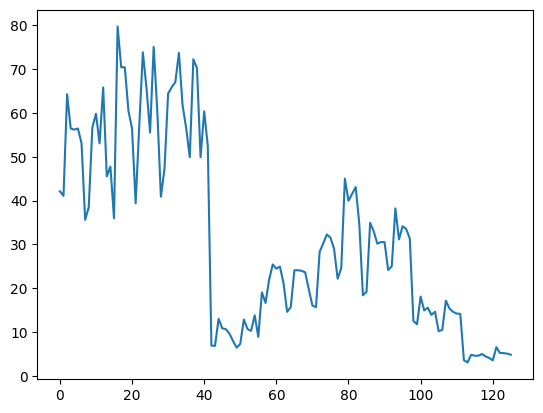

In [3]:
plt.plot(data['alpha_variants'])

In [4]:
path = 'hyperparameter/Infected/alpha/*.pkl'
files = glob.glob(path)
dic_hyperparameter = {}
for file in files:
    dic_hyperparameter[file[30:-4]] = load_hyperparameter(file)
    
dic_hyperparameter

{'BiGRU': [539, 1e-05, 50, 2, 64, 8, 0.25],
 'BiLSTM': [332, 0.0001, 50, 4, 32, 16, 0.25],
 'BiRNN': [643, 1e-05, 50, 8, 32, 32, 0.25],
 'GRU': [508, 0.0001, 50, 4, 32, 32, 0.25],
 'LSTM': [450, 0.001, 50, 4, 32, 16, 0.25],
 'RNN': [407, 0.001, 50, 4, 64, 32, 0.25],
 'seq2seq_BiGRU': [434,
  0.001,
  20,
  1,
  32,
  16,
  0.25,
  <function utils.criterion2(actual, predict)>],
 'seq2seq_BiLSTM': [461,
  0.001,
  50,
  2,
  32,
  8,
  0.25,
  <function utils.criterion3(actual, predict)>],
 'seq2seq_BiRNN': [572,
  0.001,
  50,
  4,
  32,
  8,
  0.25,
  <function utils.criterion3(actual, predict)>],
 'seq2seq_GRU': [1298,
  0.001,
  50,
  2,
  64,
  16,
  0.25,
  <function utils.criterion2(actual, predict)>],
 'seq2seq_LSTM': [1237,
  0.001,
  50,
  2,
  64,
  16,
  0.25,
  <function utils.criterion3(actual, predict)>],
 'seq2seq_RNN': [1039,
  0.001,
  50,
  2,
  32,
  32,
  0.25,
  <function utils.criterion2(actual, predict)>]}

In [5]:
city_list = ['광주', '대구', '세종', '경기', '경남']
city_predicted = {}

for city in city_list:
    
    dic_model = load_model_multiple(dic_hyperparameter, 'Infected', city, 'alpha')
    data = dic_files[city]
    df = Prepare_df.processing(data, 'stdDay', 'alpha_variants')

    x = df.iloc[:, 0:]
    y = df.iloc[:,:1]

    ms = MinMaxScaler()
    ss = StandardScaler()

    ss.fit(x)
    ms.fit(y)

    predicted_values = {}
    num_model = 0
    for name, state in dic_model.items():
        batch_size = dic_hyperparameter[name][4]
        if num_model < 6:
            x, y, x_ss, y_ms, train_loader, test_loader = Prepare_df.split_data(df, 57, 60, 1, batch_size, 'mto')
            label_y, predicted = predict_mto(state, df, x_ss, y_ms)
            predicted_values[name] = [label_y, predicted]
        else:
            x, y, x_ss, y_ms, train_loader, test_loader = Prepare_df.split_data(df, 51, 60, 7, batch_size, 'mtm')
            label_y, predicted, first_label_y, first_predicted, all_predicted = predict_mtm(state, df, x_ss, y_ms, 7, 0.5, device)
            predicted_values[name] = [label_y, predicted, first_label_y, first_predicted, all_predicted]

        num_model += 1
        
    city_predicted[city] = predicted_values

광주 : 0.4766718942126592


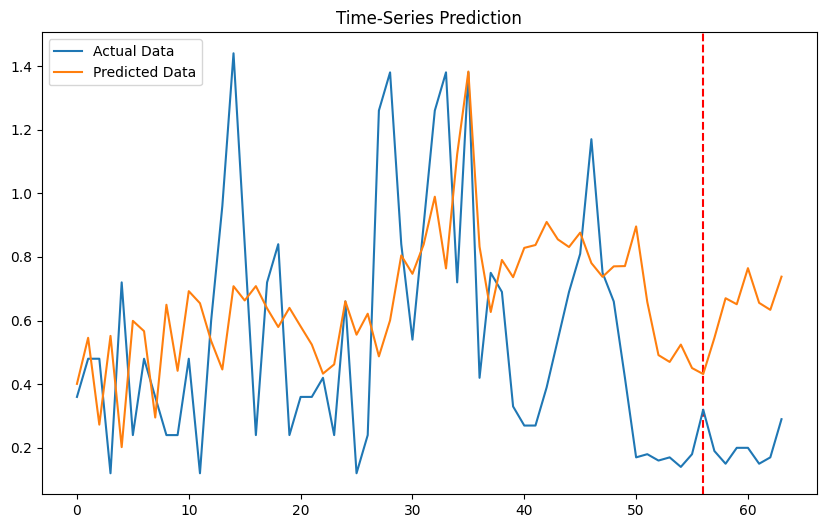

광주 : 0.5134775642742195


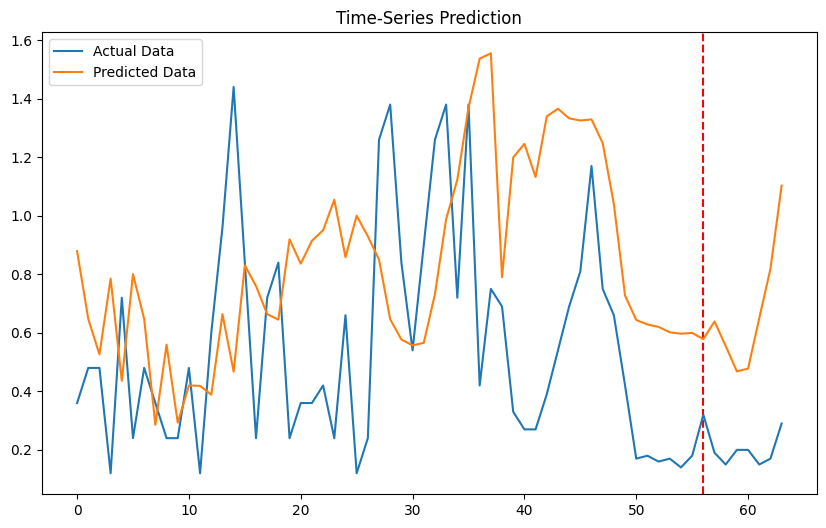

광주 : 0.9057418450902607


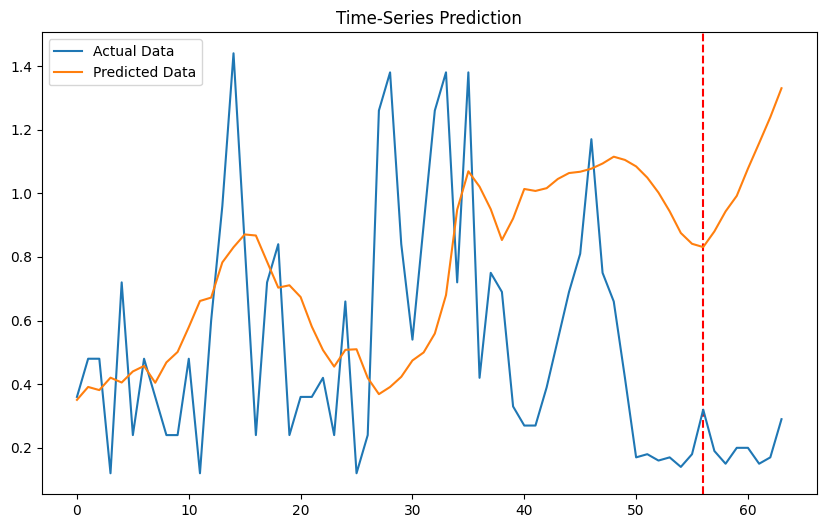

광주 : 0.7013177958948795


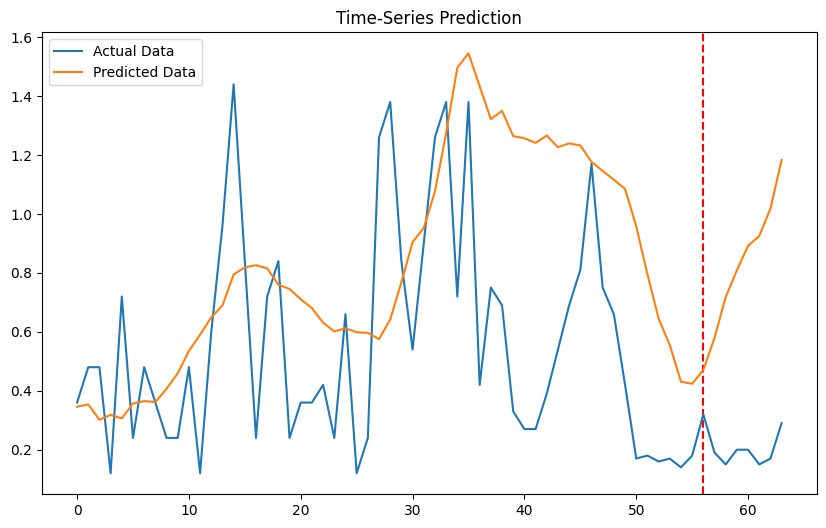

광주 : 0.7390373838645093


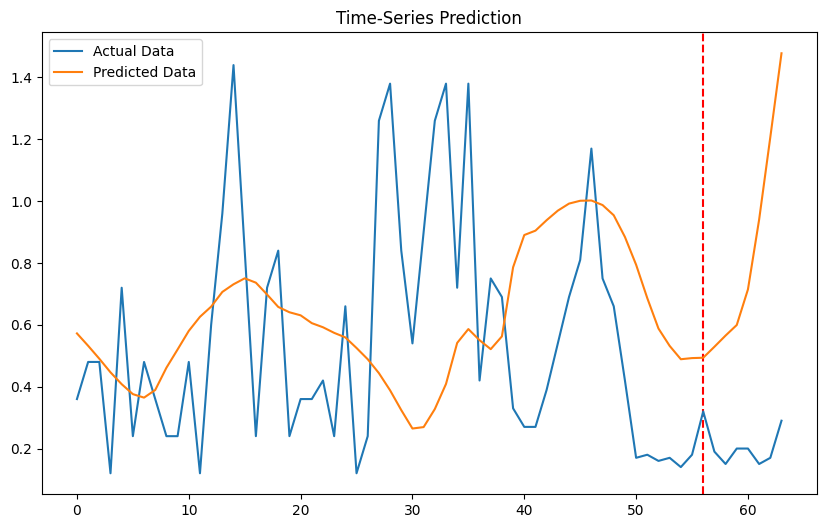

광주 : 0.7665396306964919


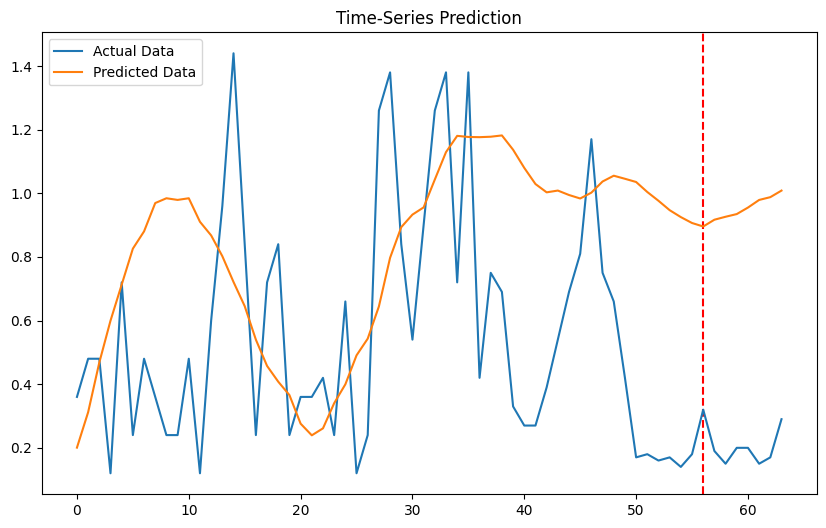

광주 : 0.43215844004941795


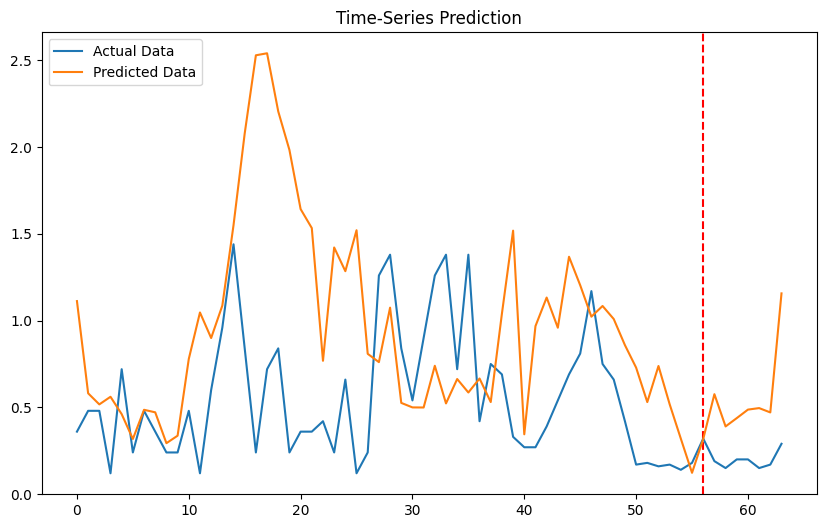

광주 : 0.22663804143191157


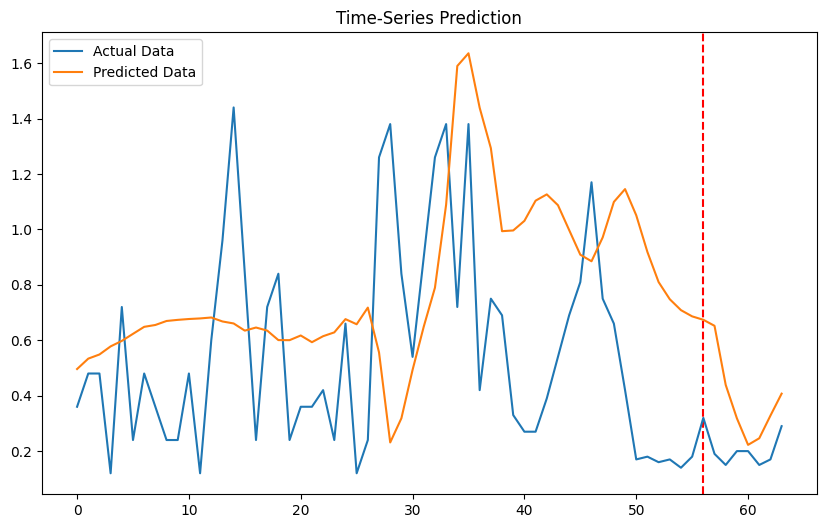

광주 : 0.6361642072576937


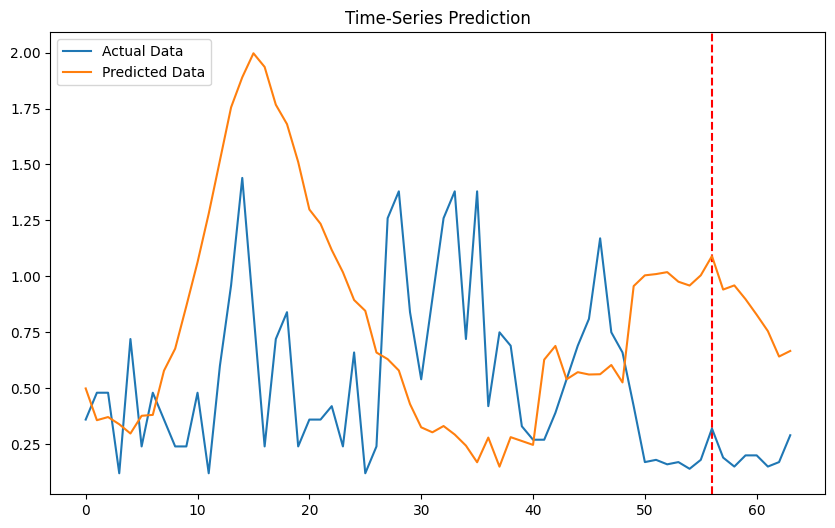

광주 : 0.8124580005647875


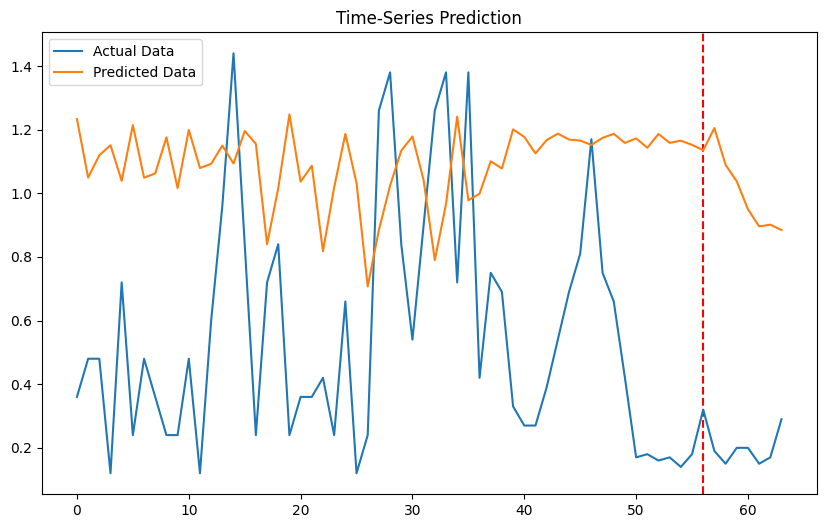

광주 : 0.7903793978782164


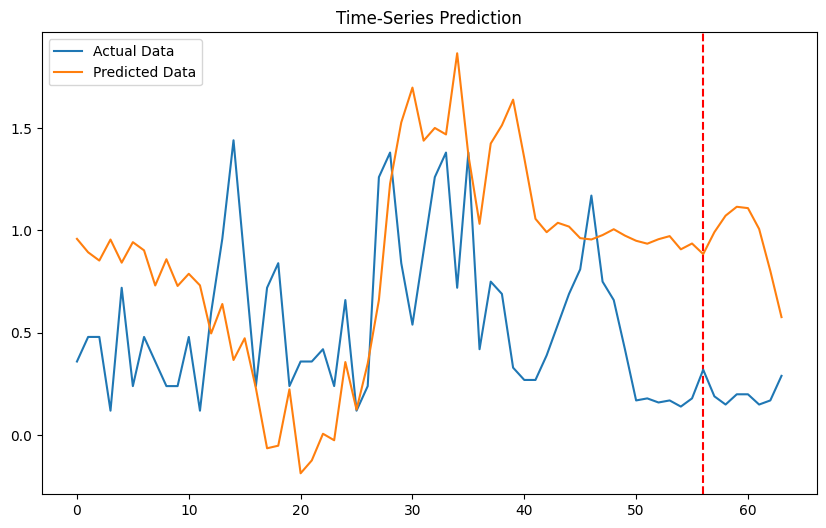

광주 : 0.7607419916233501


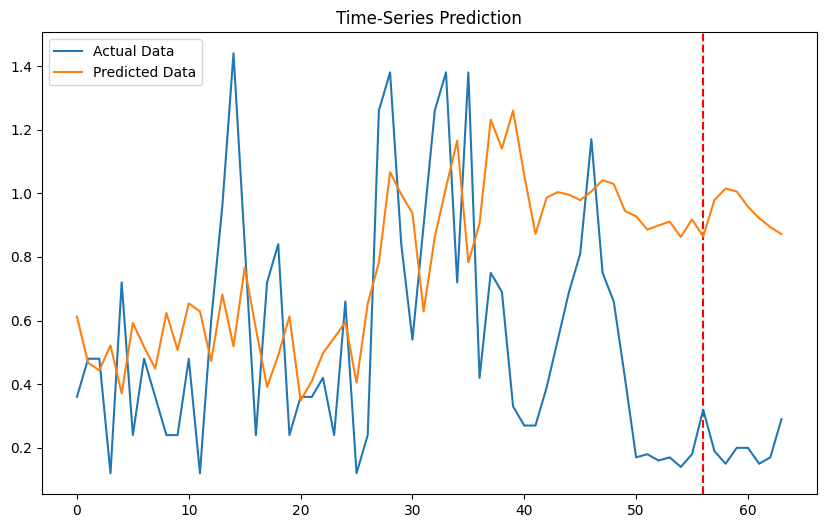

rmse가 가장 적은 모델 :  seq2seq_LSTM
대구 : 0.3827327139094807


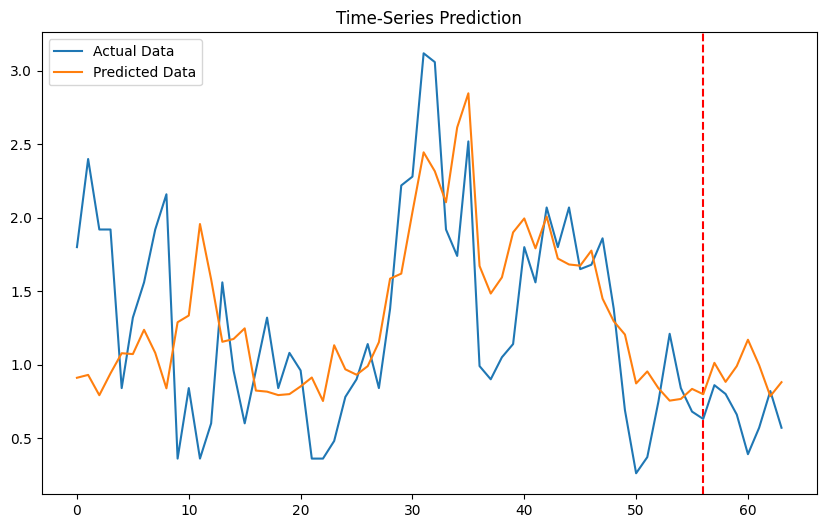

대구 : 0.5373419518203576


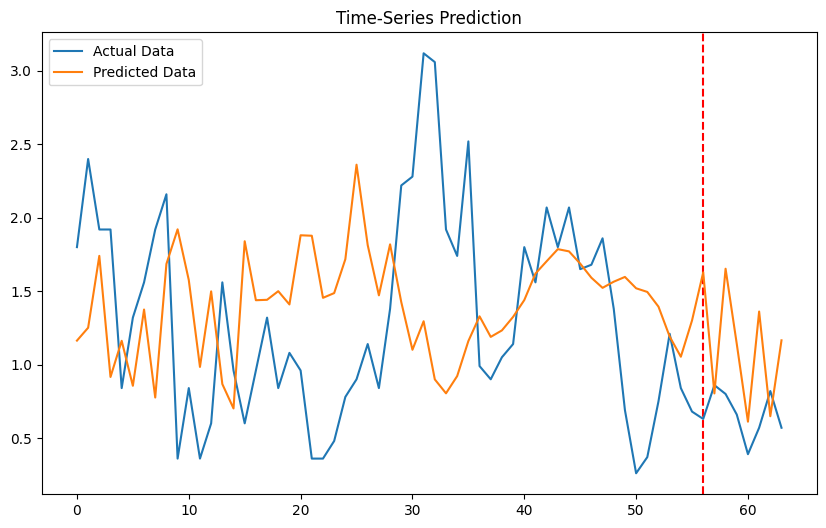

대구 : 0.8703509187009009


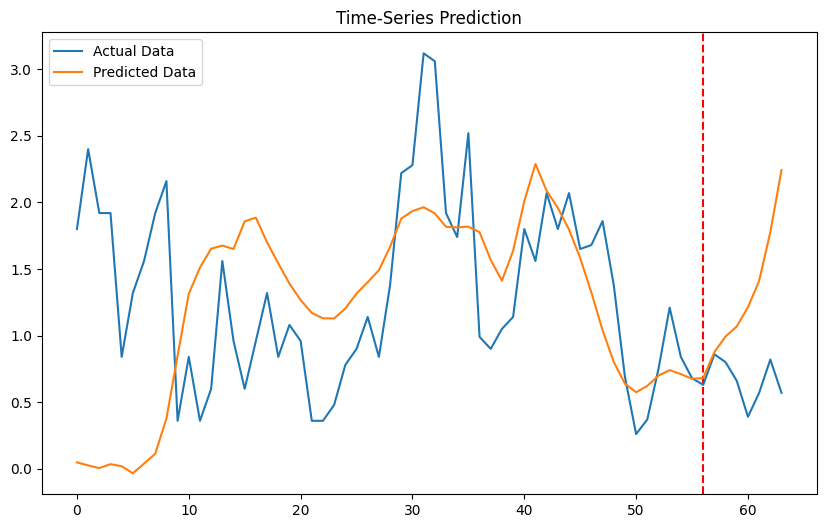

대구 : 0.2850039218958998


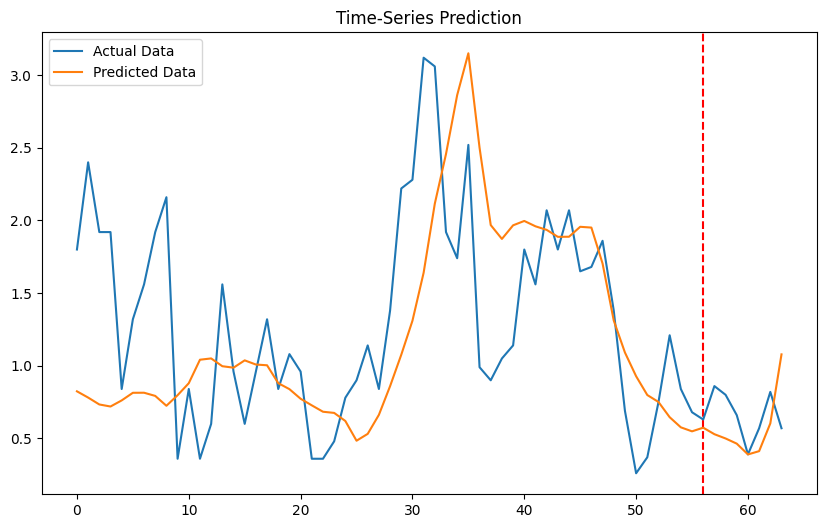

대구 : 0.49432524899759234


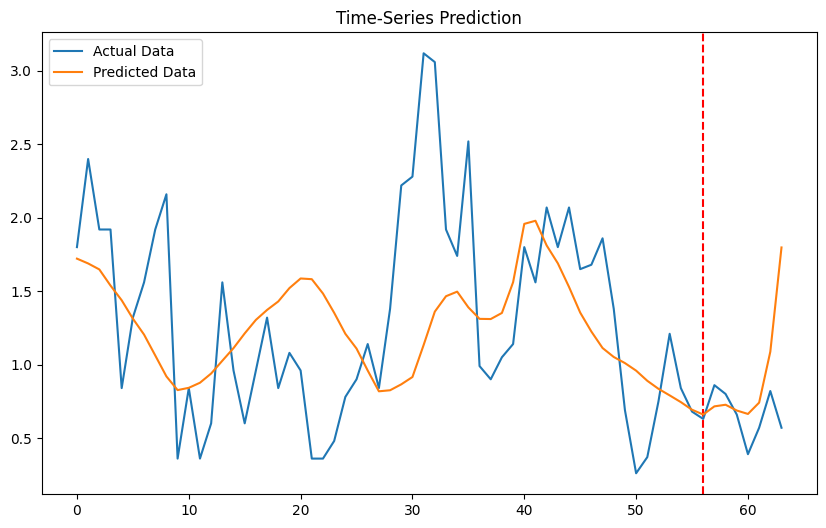

대구 : 1.252400049192293


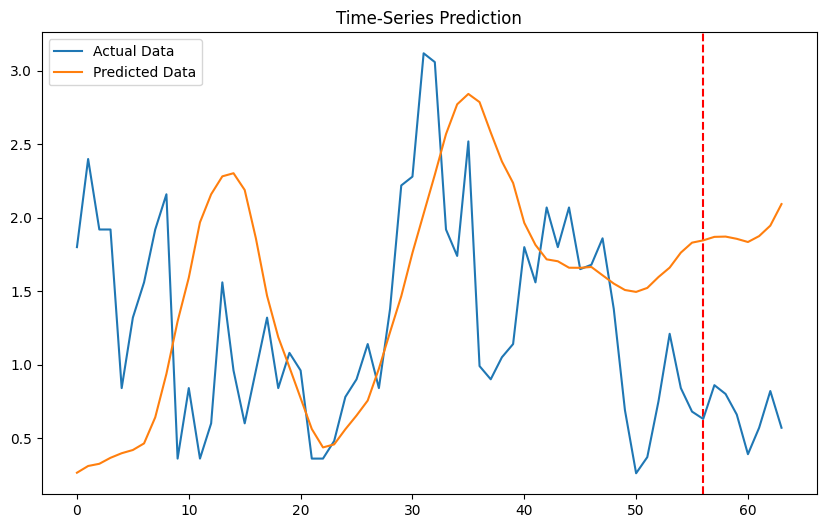

대구 : 2.6397781368432027


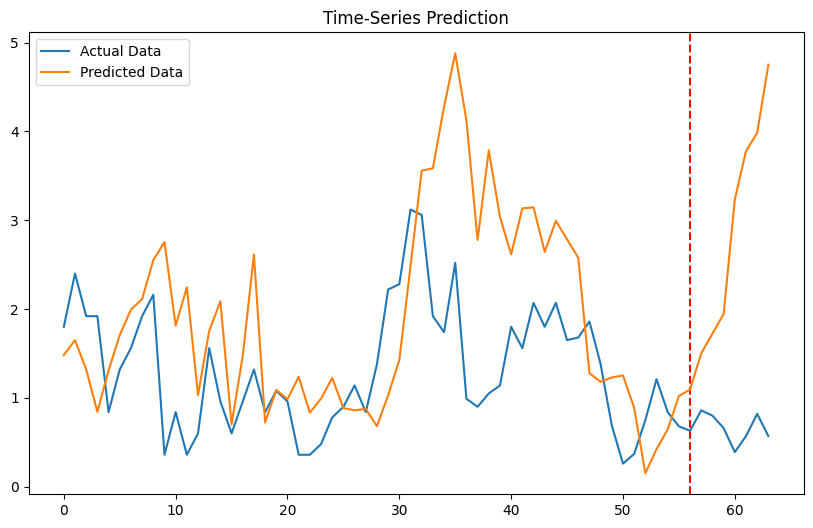

대구 : 0.48051903624342934


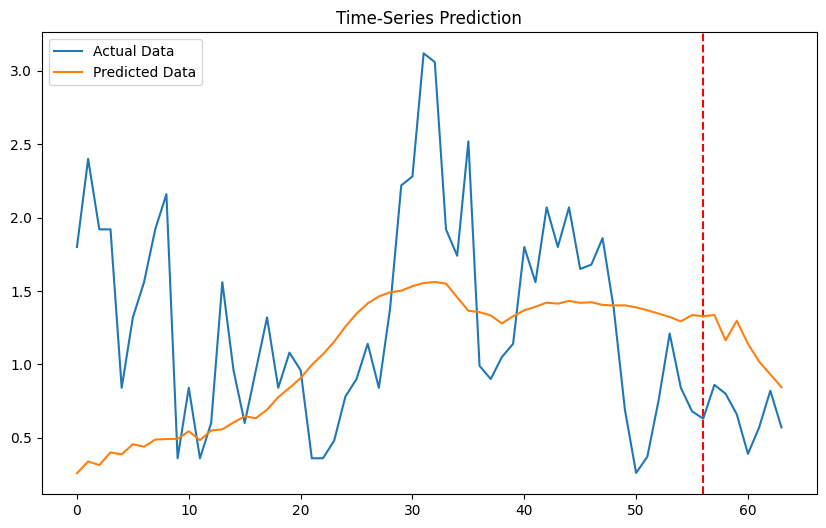

대구 : 1.7347945659502209


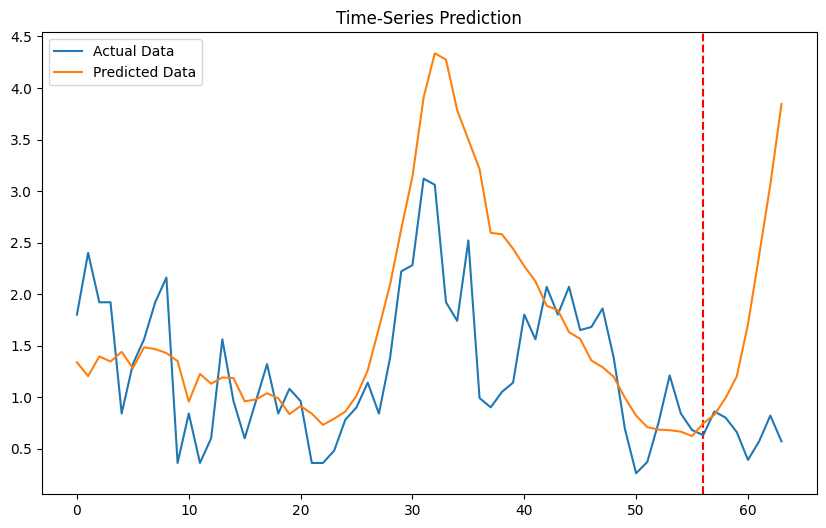

대구 : 1.4939873510792976


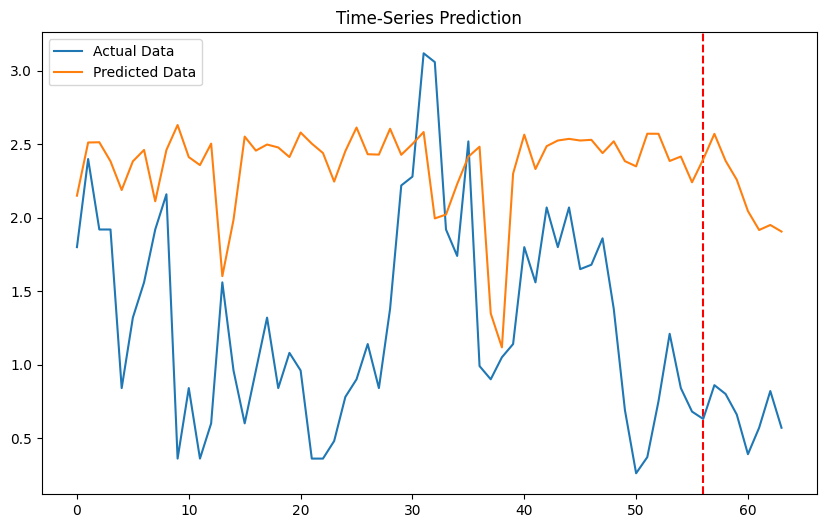

대구 : 2.275193732260536


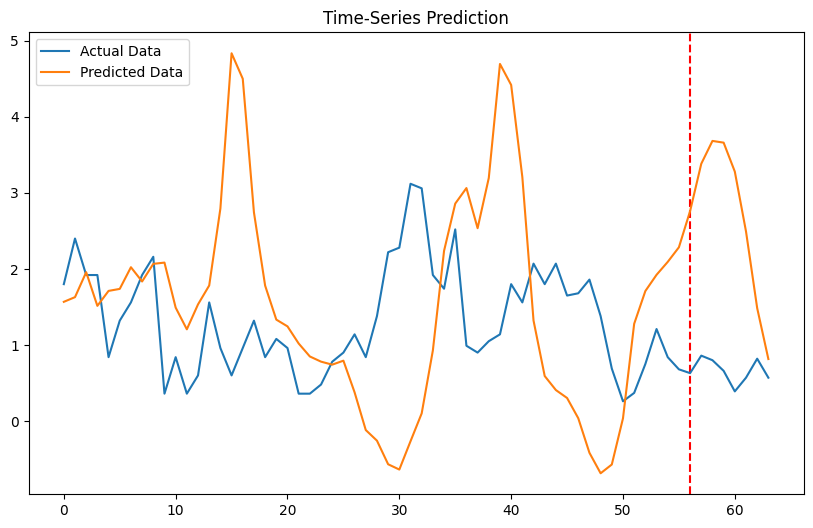

대구 : 1.3638512149527218


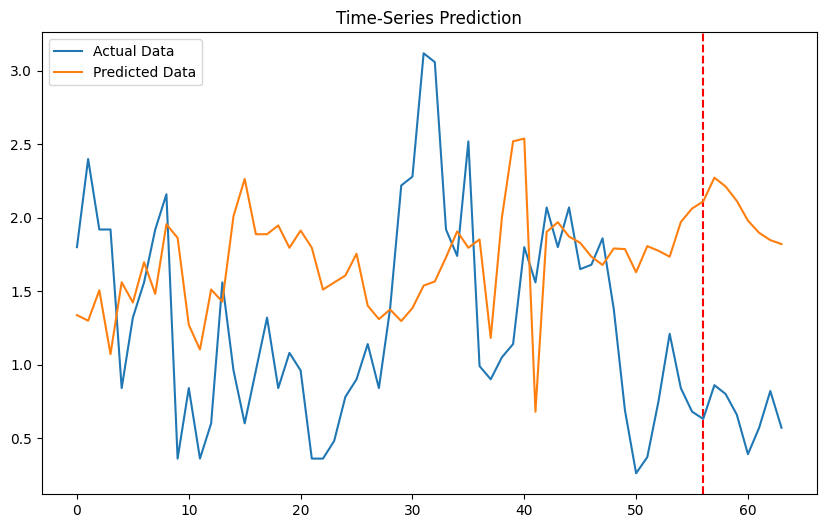

rmse가 가장 적은 모델 :  BiRNN
세종 : 0.09018572222285219


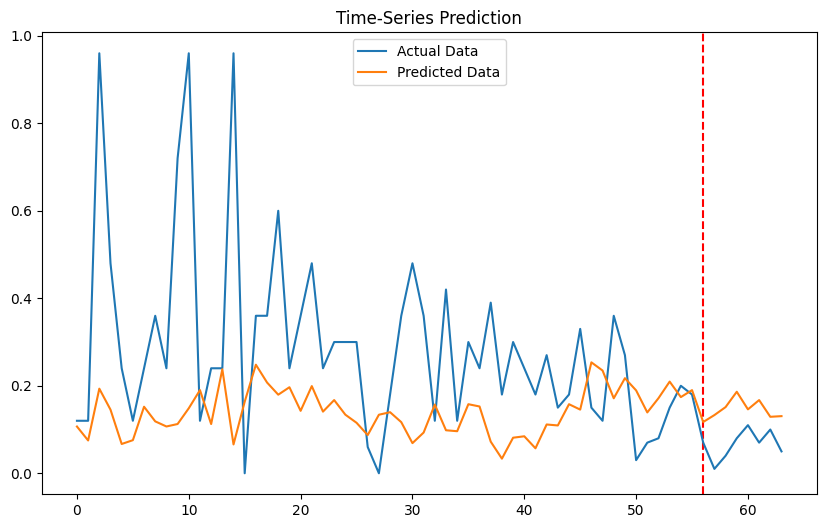

세종 : 0.19804332887984763


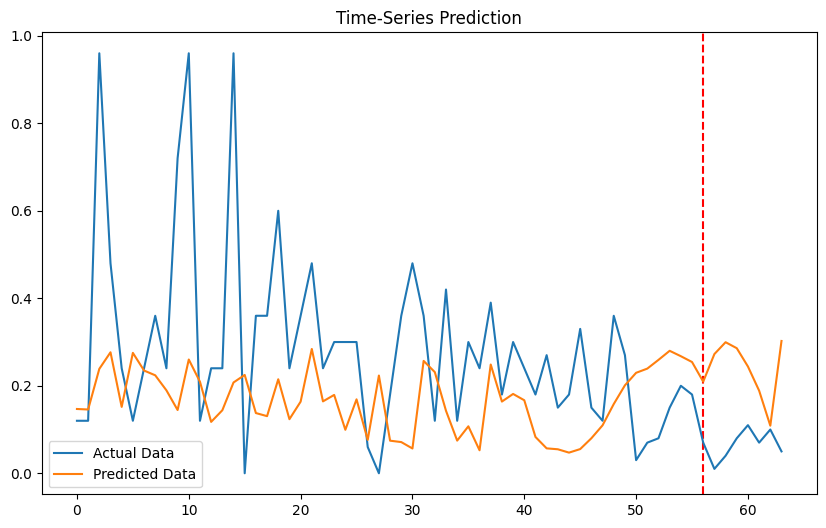

세종 : 0.15810576139049531


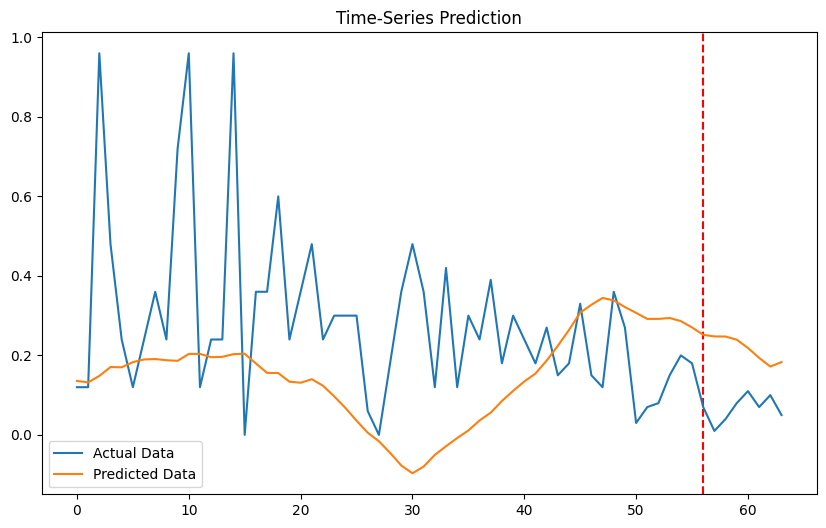

세종 : 0.04669347523525584


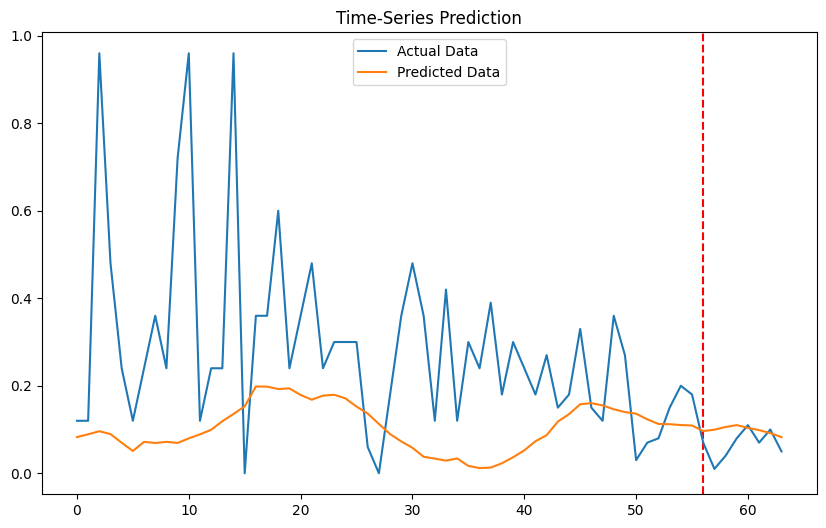

세종 : 0.09066163835156822


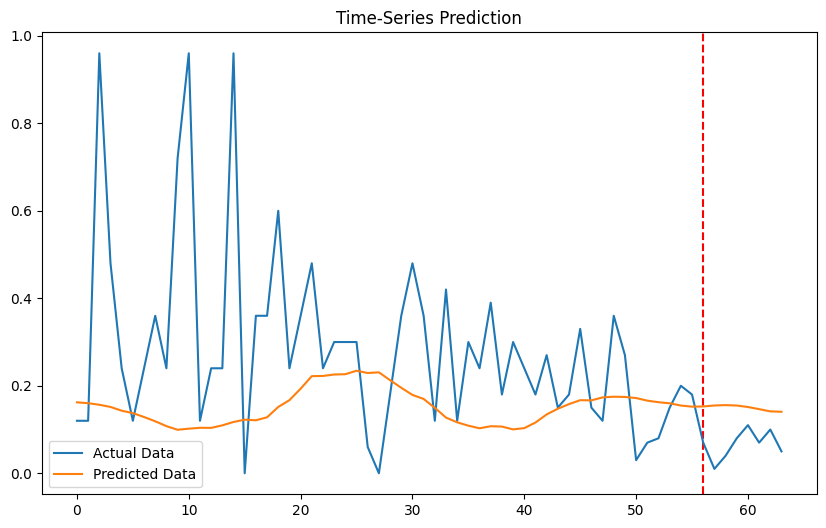

세종 : 0.1351412086716793


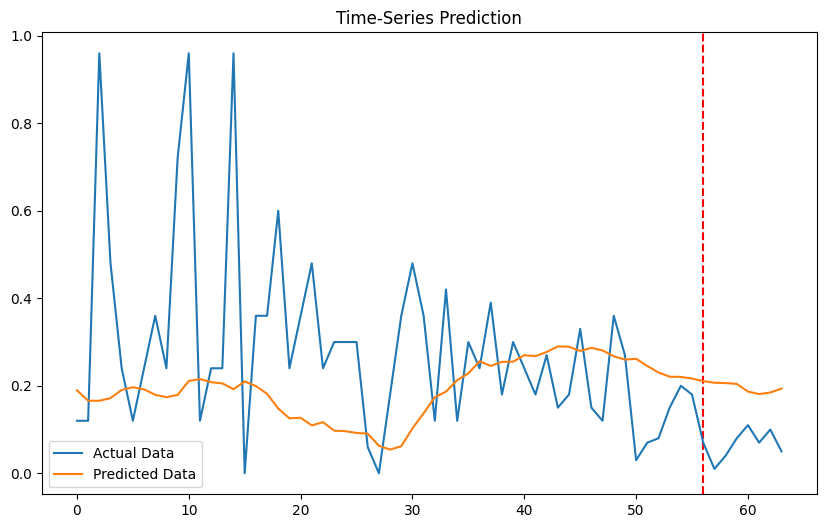

세종 : 0.06916505279702462


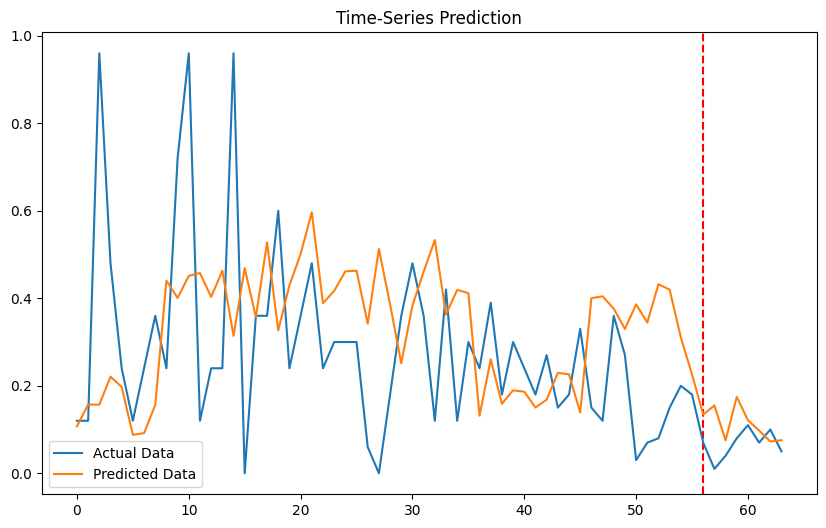

세종 : 0.11428119958042475


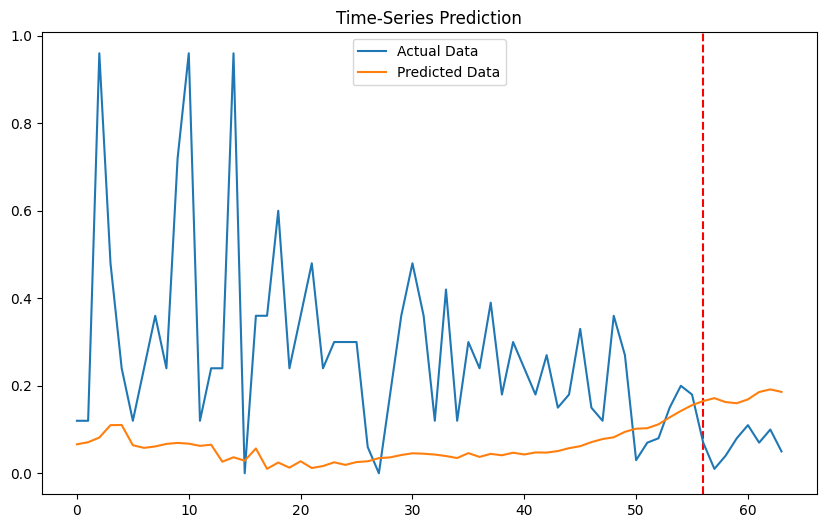

세종 : 0.2740185014602359


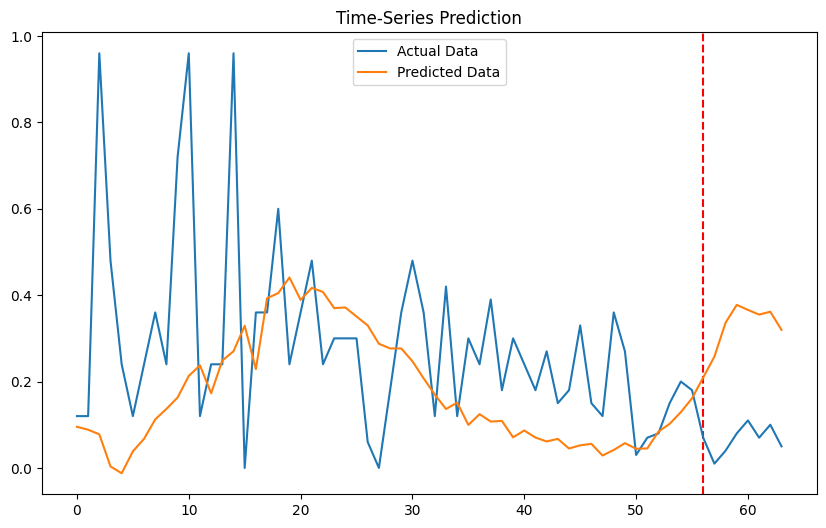

세종 : 0.24243261638648594


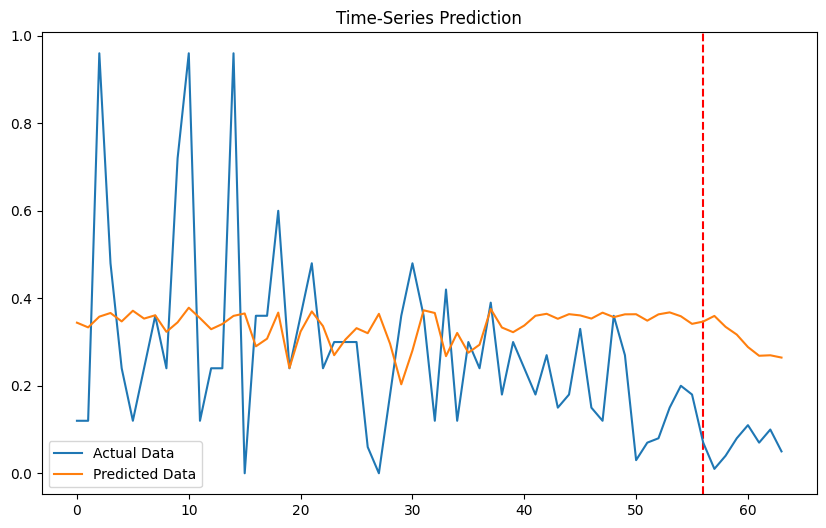

세종 : 0.09594288299102456


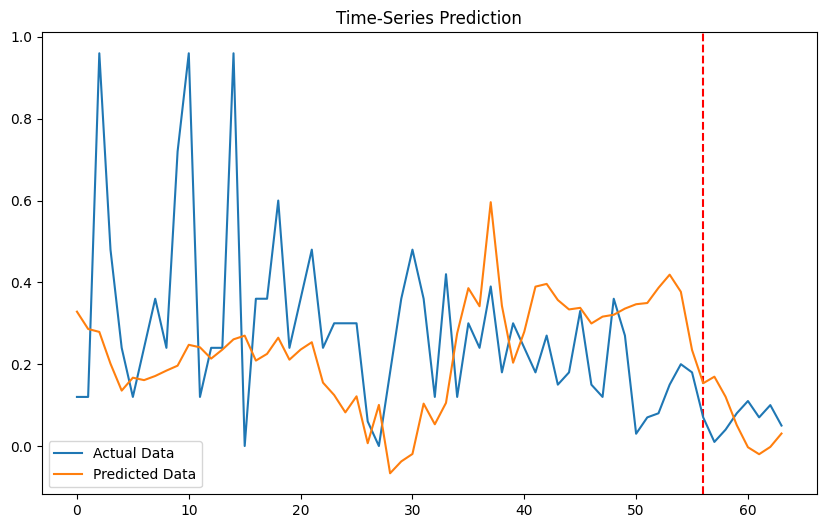

세종 : 0.1877785639958817


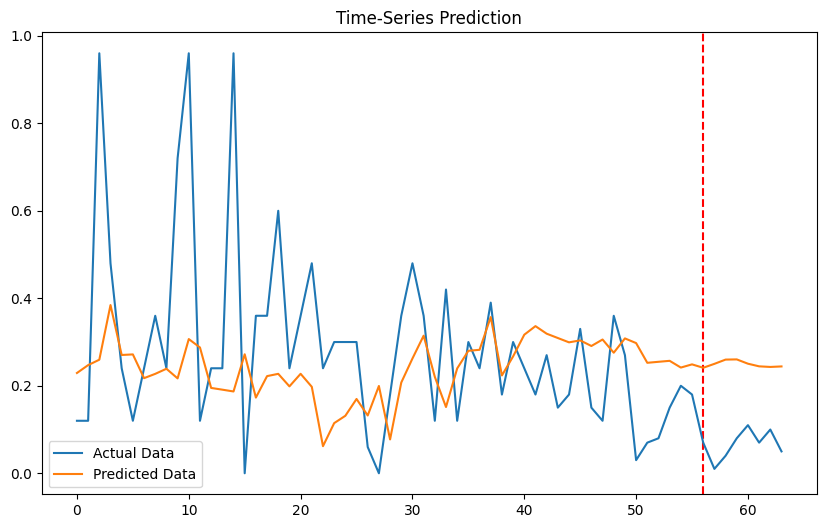

rmse가 가장 적은 모델 :  BiRNN
경기 : 4.96068893170334


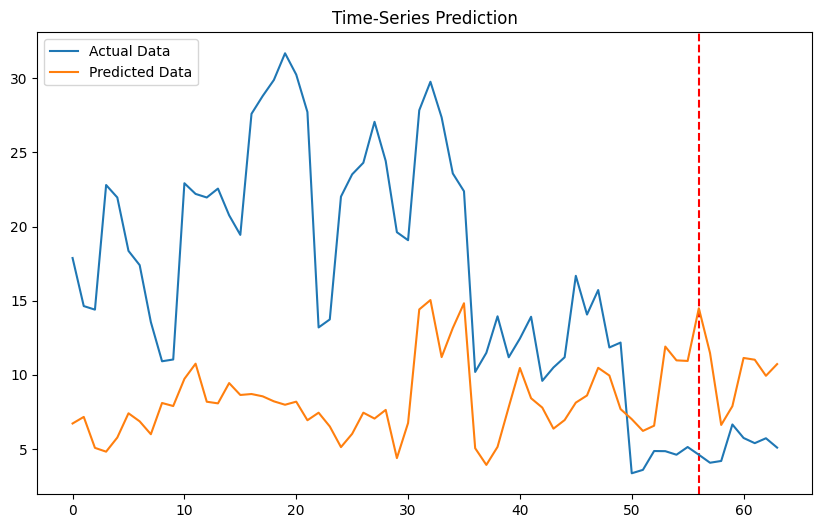

경기 : 3.7294990917060993


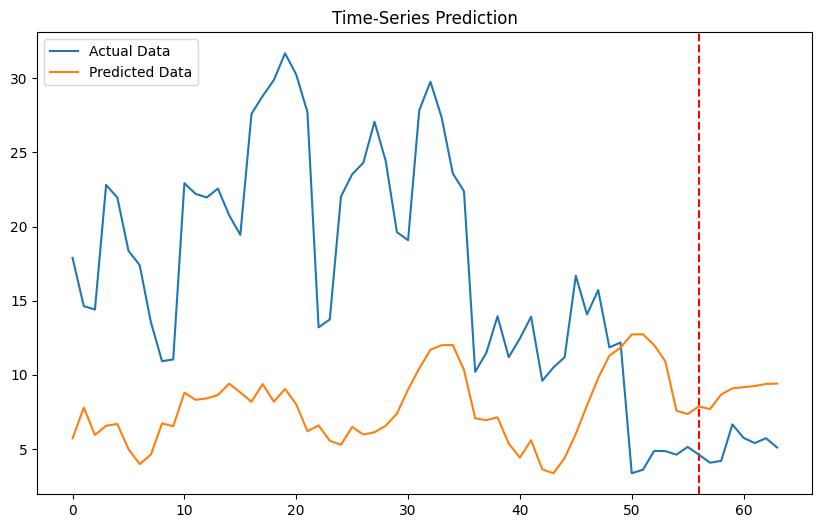

경기 : 13.578276709092059


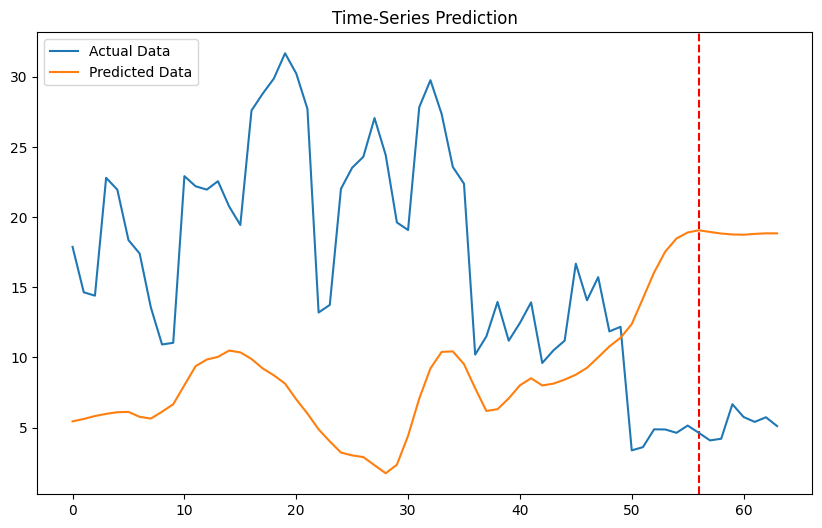

경기 : 5.088431548141056


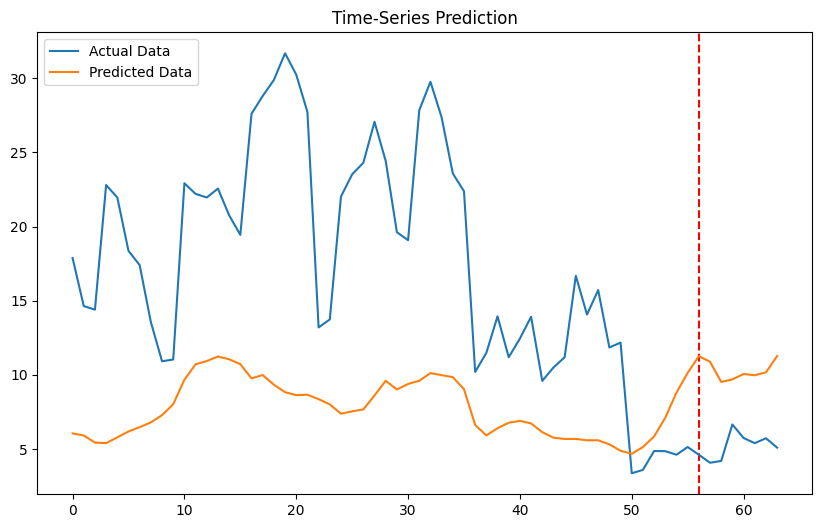

경기 : 11.75547565544424


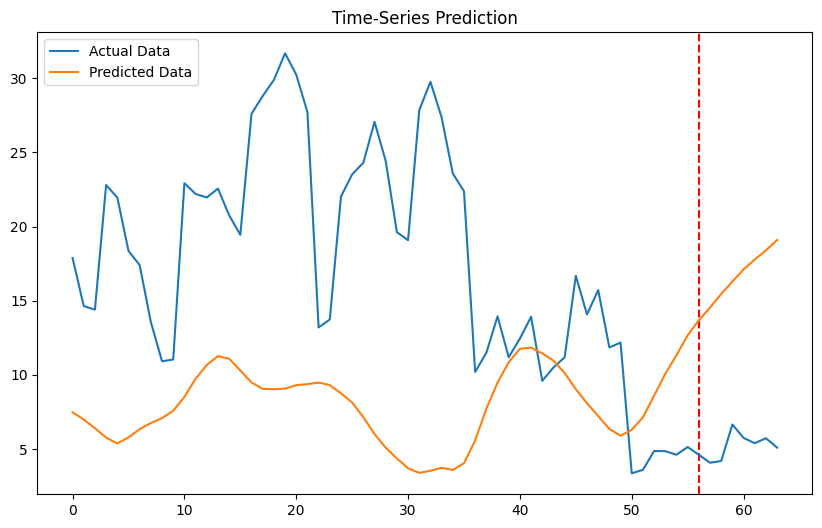

경기 : 7.2916884358399


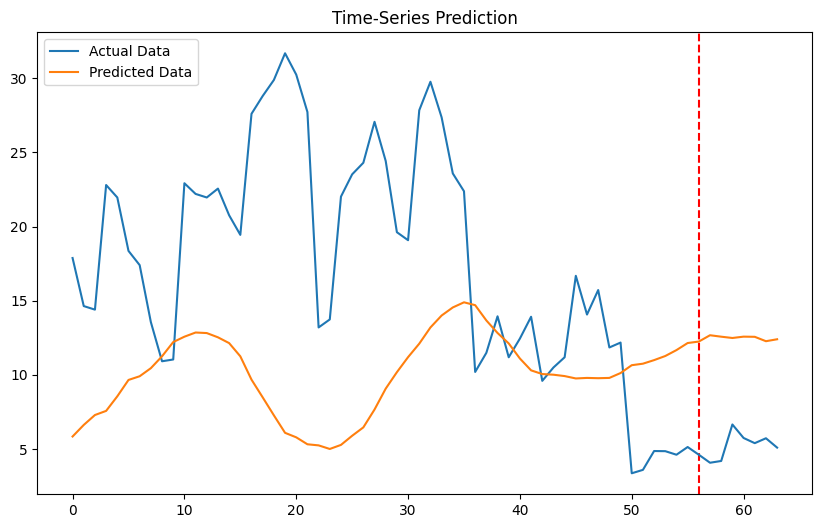

경기 : 3.0493015114853397


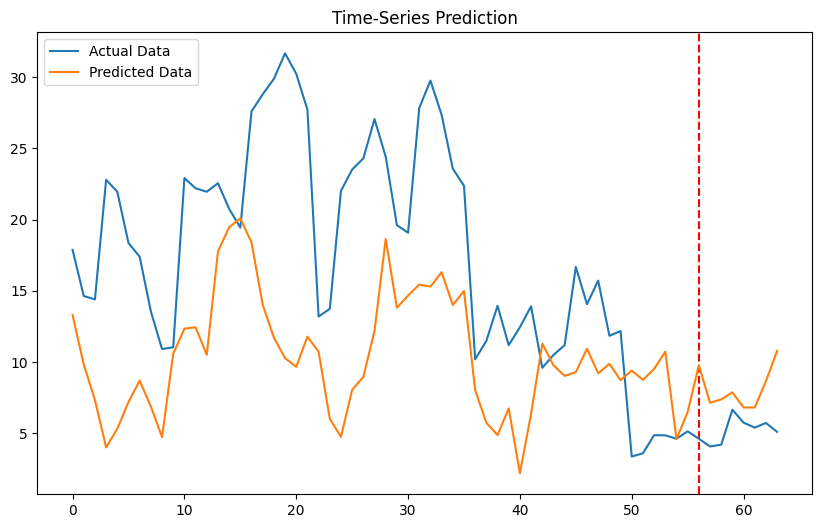

경기 : 4.3967036731040805


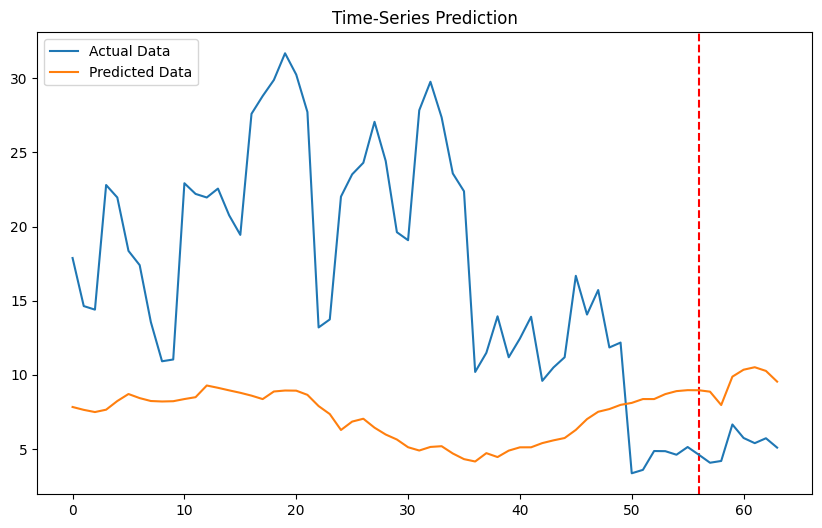

경기 : 10.967110100992201


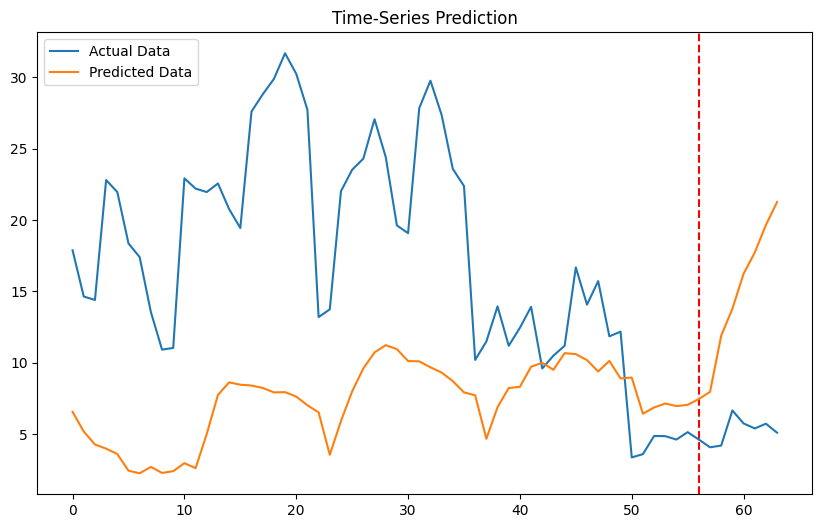

경기 : 6.745415437543401


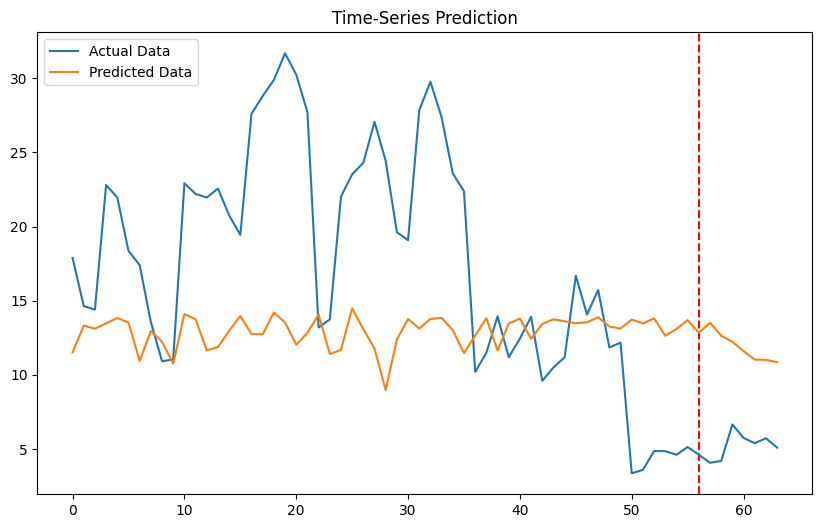

경기 : 8.3884788339983


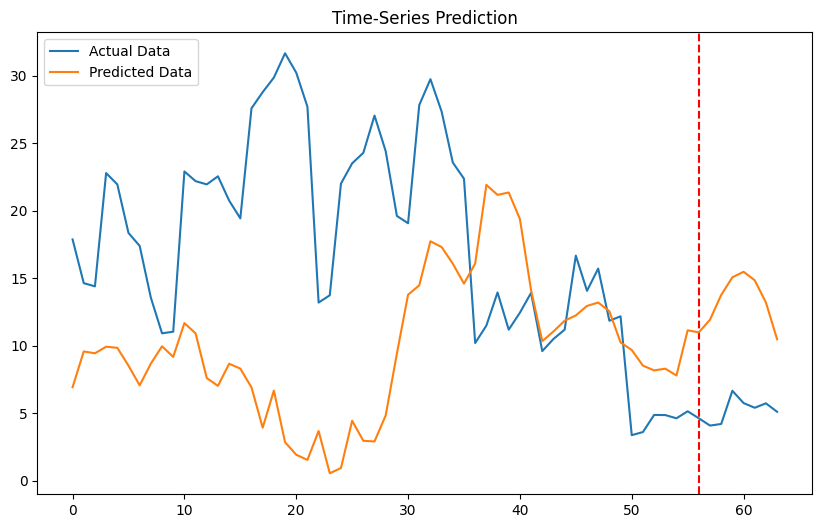

경기 : 5.085043551728306


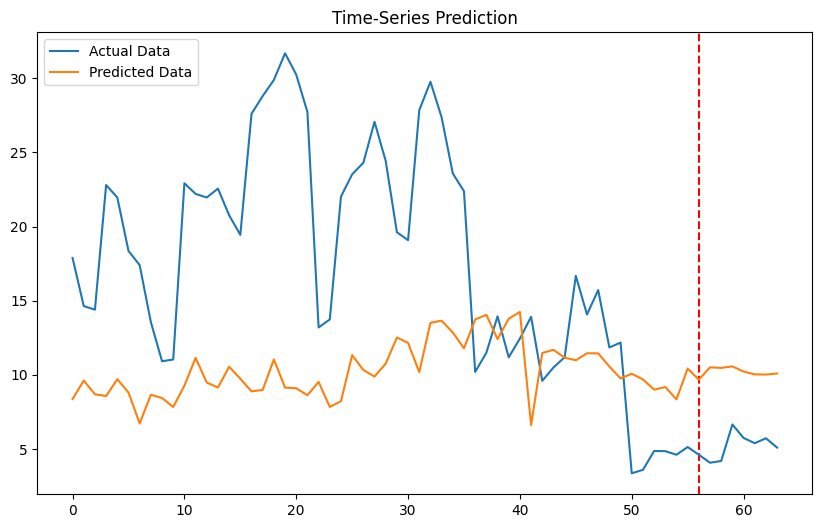

rmse가 가장 적은 모델 :  seq2seq_RNN
경남 : 0.4417906749772615


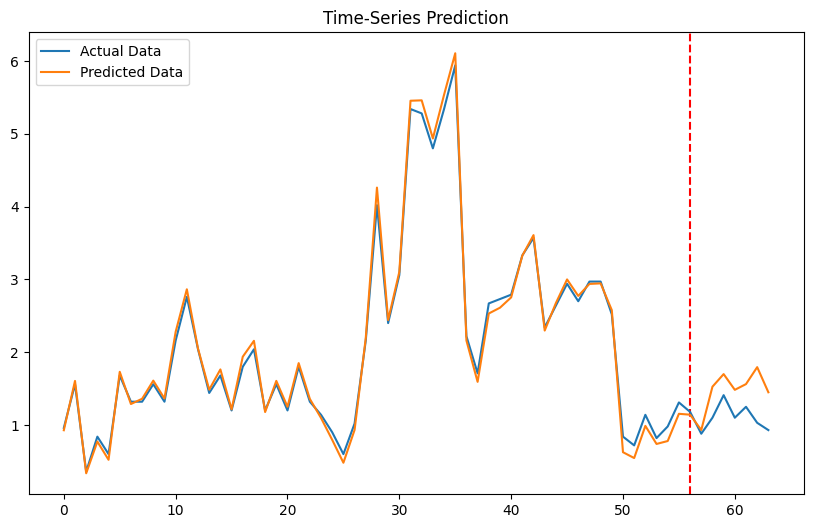

경남 : 0.48885493337442537


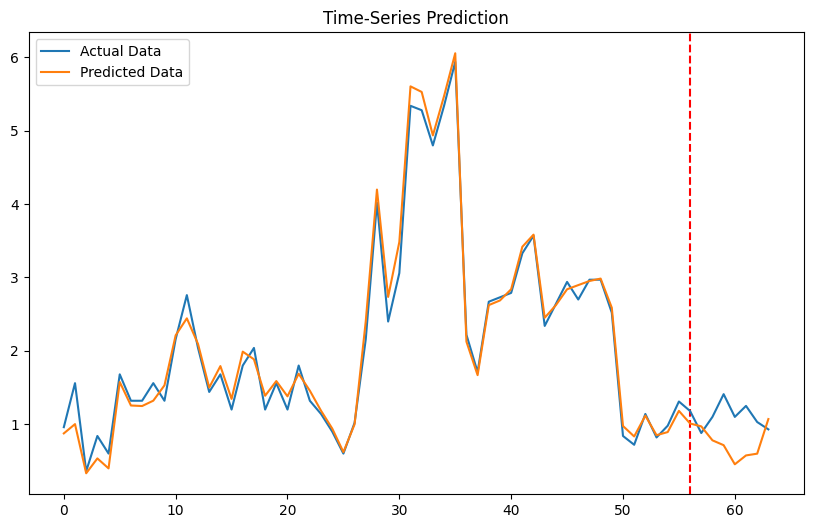

경남 : 0.9338216782702164


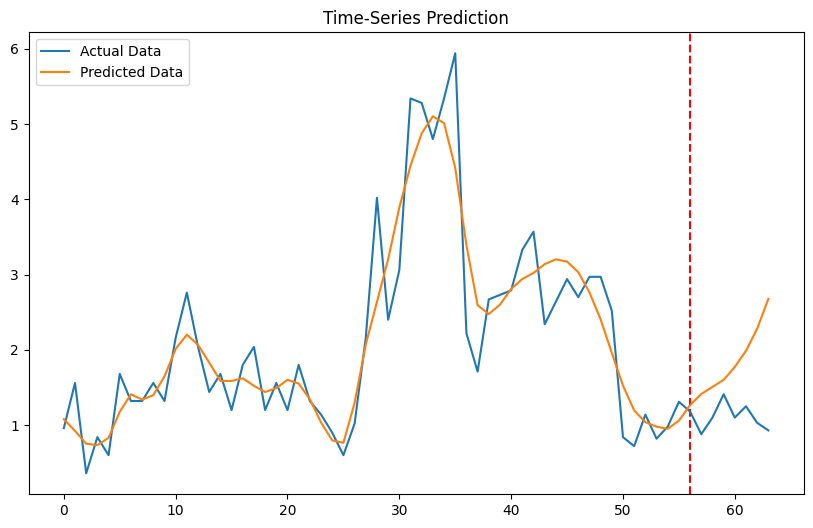

경남 : 0.34535235049879814


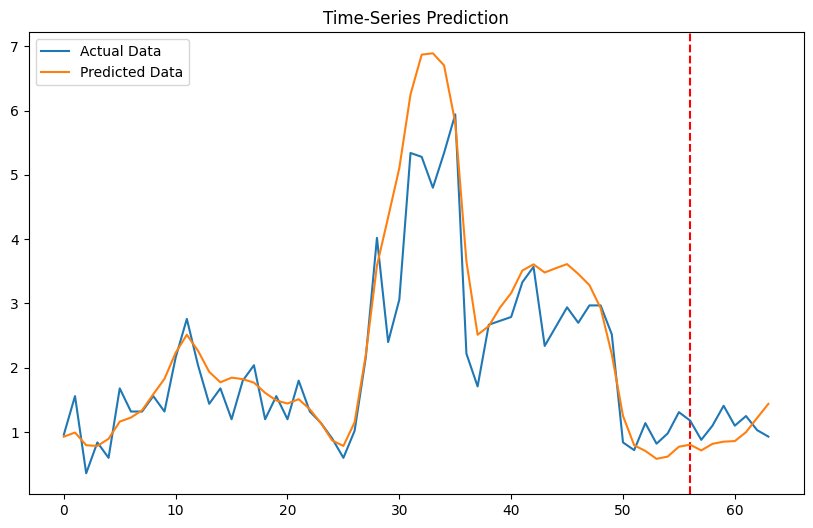

경남 : 0.5073189904950463


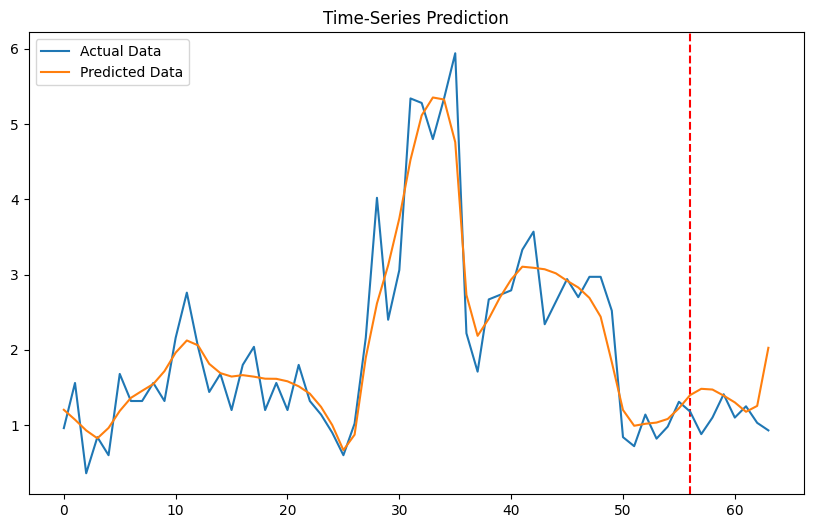

경남 : 1.0735952336391723


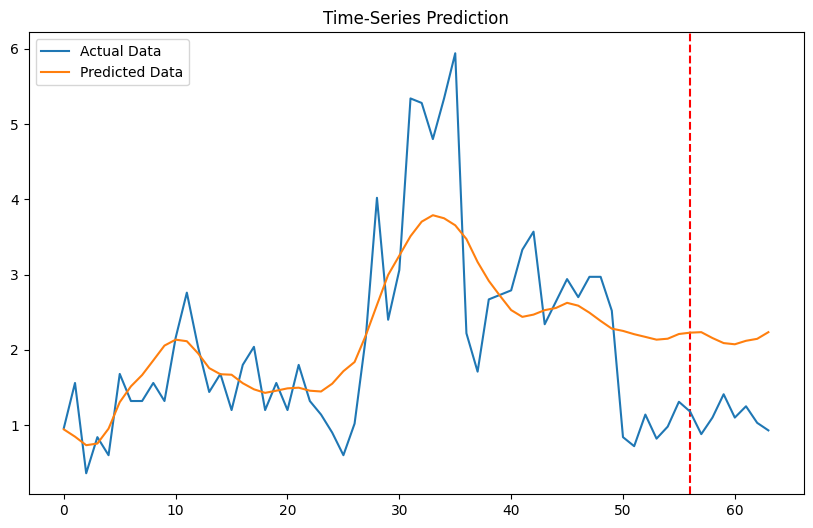

경남 : 0.9186088116172317


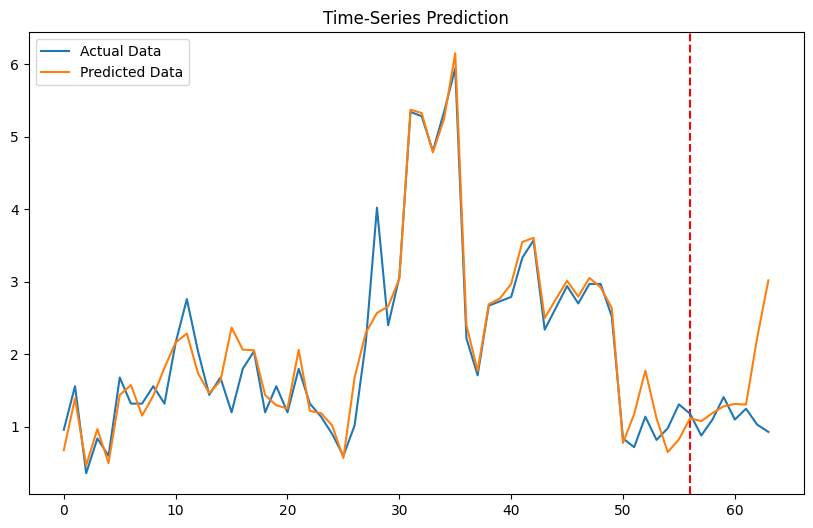

경남 : 0.6855126614197782


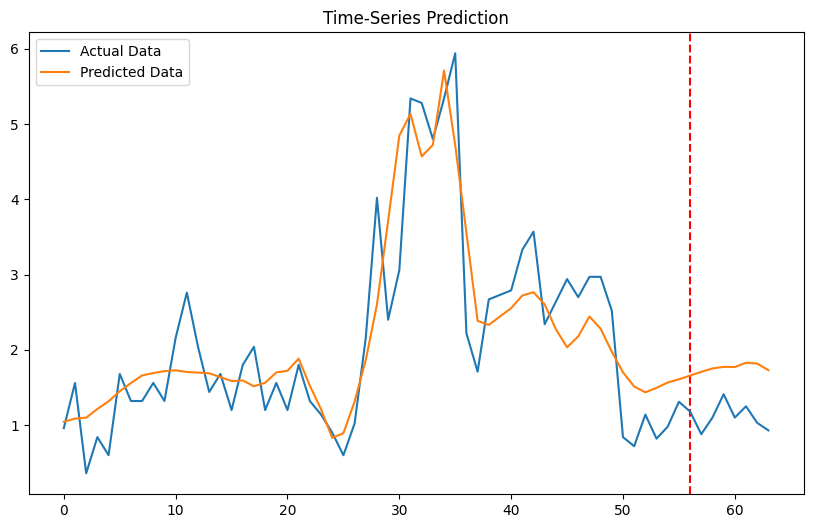

경남 : 1.184114650001745


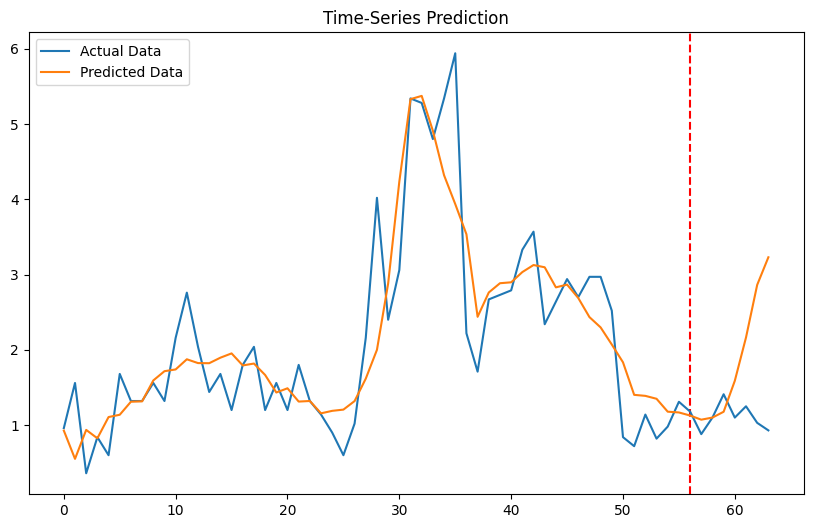

경남 : 1.4531575681256672


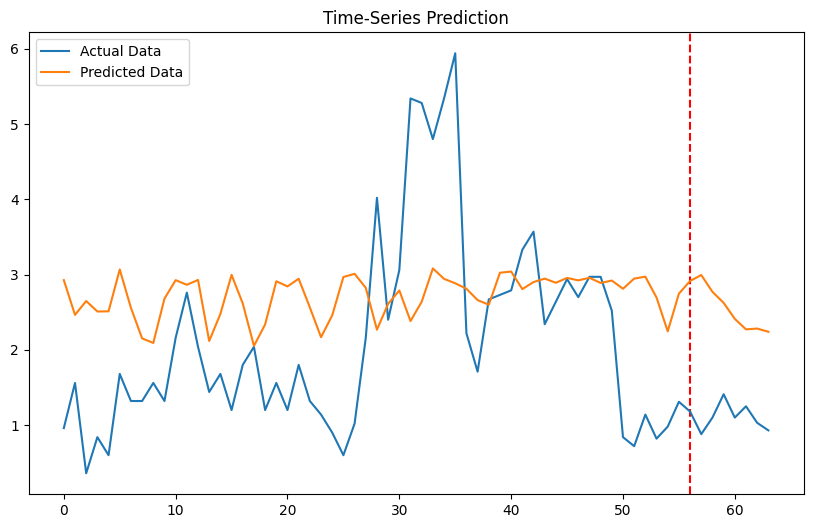

경남 : 1.7942819212048176


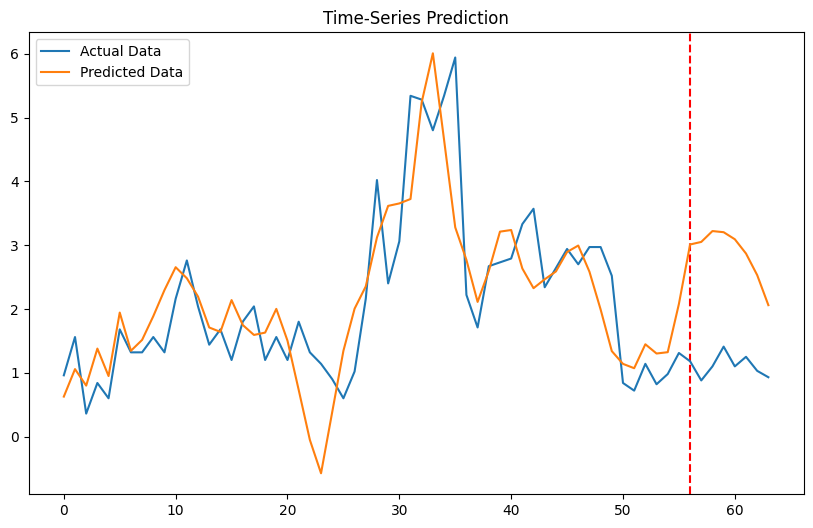

경남 : 1.3694574313335706


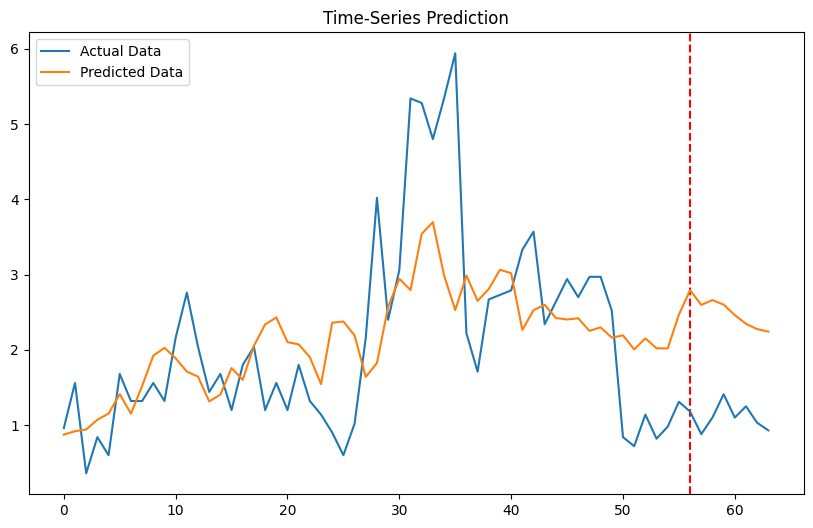

rmse가 가장 적은 모델 :  BiRNN


In [6]:
for city in city_list:
    
    actual_data = city_predicted[city]['RNN'][0]
    rmse_min = np.inf
    num_model = 0

    for name, file in city_predicted[city].items():
        if num_model < 6:
            predicted_data = file[1]
        else:
            predicted_data = file[4]

        rmse_val = rmse(actual_data[-7:], predicted_data[-7:])
        if rmse_min > rmse_val:
            rmse_min = rmse_val
            best_model = name
            best_actual = actual_data
            best_predicted = predicted_data

        print(city + ' :', rmse_val)
        plotting(actual_data, predicted_data, 56)

        num_model += 1

    print('rmse가 가장 적은 모델 : ', best_model)
    df_predicted = pd.DataFrame()
    df_predicted = pd.DataFrame(np.concatenate([best_actual, best_predicted], axis = 1), columns = ['Alpha_origin', 'Alpha_Predicted'])
    df_predicted.index = list(data['stdDay'][-1*len(best_actual):])
    df_predicted.to_csv(f'Data/Predicted/Variants/Infected/{city}/alpha_{best_model}.csv')